In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
import os
os.getcwd()

'C:\\Users\\Vivek\\Desktop'

In [29]:
os.chdir('C:\\Users\\Vivek\Desktop')

In [30]:
df= pd.read_csv('Churn_Modelling.csv')

In [31]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Exploratory Data Analysis**

In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.shape

(10000, 14)

In [34]:
df.size

140000

In [35]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [36]:
#Checking null values in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
#Overall Statistics about the Dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [38]:
#Dropping Irrelevant Features
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [39]:
data= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [40]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [41]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
 #Encoding Categorical data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

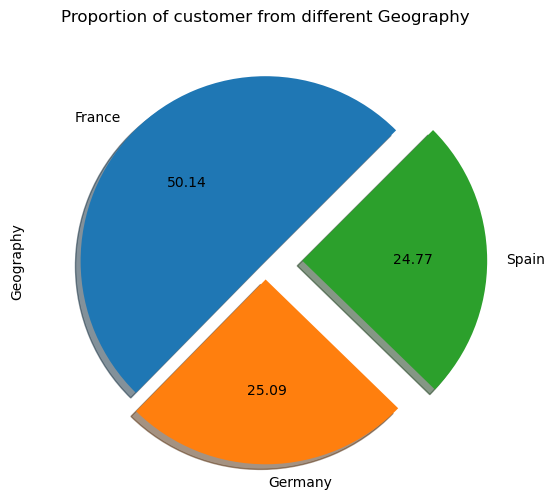

In [77]:
value_counts = pd.value_counts(df['Geography'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

In [43]:
data = pd.get_dummies(data,drop_first=True)
#here we dropped the the first element to avoid the problem of dummy trap

In [44]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [45]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

*Out of 10000, 2037 people have exited the bank and 7963 have not exited the bank*

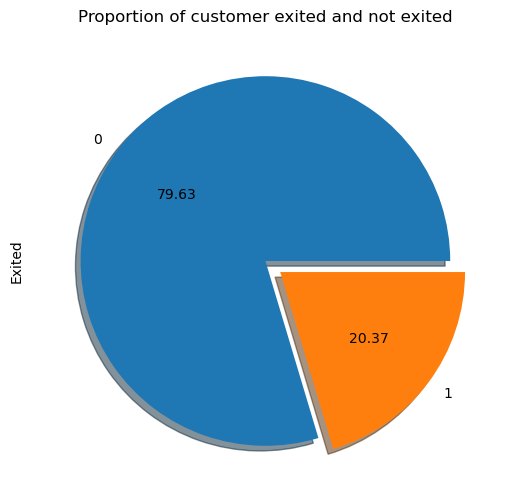

In [68]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()

*Here 0 means person has left the bank and '1' means persons has not left the bank.*

In [48]:
#Separating dependent and independent variable
X= data.drop('Exited',axis=1)
y= data['Exited']

In [49]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Splitting the dataset into Training Set and Test Set**

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

**Feature Scaling**

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc= StandardScaler()

In [56]:
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [57]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

**Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg= LogisticRegression()

In [60]:
lg.fit(X_train,y_train)

LogisticRegression()

In [112]:
y_predict= lg.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [114]:
Accuracy= accuracy_score(y_test,y_predict)

In [115]:
print('Accuracy on training data: ', Accuracy)

Accuracy on training data:  0.808


In [116]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [117]:
print(confusion_matrix(y_test,y_predict))

[[1540   53]
 [ 331   76]]


**SVM**

In [69]:
from sklearn import svm

In [70]:
svm = svm.SVC()

In [71]:
svm.fit(X_train,y_train)

SVC()

In [72]:
y_predict2= svm.predict(X_test)

In [74]:
Accuracy2 = accuracy_score(y_test,y_predict2)

In [75]:
print('Accuracy on training data: ', Accuracy2)

Accuracy on training data:  0.861


In [76]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.83      0.40      0.54       407

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



**KNN**

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [83]:
y_predict3= knn.predict(X_test)

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [84]:
Accuracy_knn = accuracy_score(y_test,y_predict3)

In [85]:
print('Accuracy on training data: ',Accuracy_knn)

Accuracy on training data:  0.824


In [86]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.62      0.34      0.44       407

    accuracy                           0.82      2000
   macro avg       0.74      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000



**Random Forest Classifier**

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier()

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
y_predict_rf = rf.predict(X_test)

In [91]:
Accuracy_rf = accuracy_score(y_test,y_predict_rf)

In [92]:
print('Accuracy on training data: ',Accuracy_rf)

Accuracy on training data:  0.8635


In [93]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



**Gradient Boosting Classifier**

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc = GradientBoostingClassifier()

In [96]:
gbc.fit(X_test,y_test)

GradientBoostingClassifier()

In [97]:
y_predict_gbc = gbc.predict(X_test)

In [98]:
Accuracy_gbc = accuracy_score(y_test,y_predict_gbc)

In [99]:
print('Accuracy: ',Accuracy_gbc)

Accuracy:  0.9005


In [100]:
print(classification_report(y_test,y_predict_gbc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1593
           1       0.91      0.57      0.70       407

    accuracy                           0.90      2000
   macro avg       0.91      0.78      0.82      2000
weighted avg       0.90      0.90      0.89      2000



**Final data**

In [101]:
final_data= pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                          'Accuracy':[accuracy_score(y_test,y_predict),
                                     accuracy_score(y_test,y_predict2),
                                     accuracy_score(y_test,y_predict3),
                                     accuracy_score(y_test,y_predict_rf),
                                     accuracy_score(y_test,y_predict_gbc)]})

In [102]:
final_data

,Models,Accuracy
0,LR,0.8080
1,SVC,0.8610
2,KNN,0.8240
3,RF,0.8635
4,GBC,0.9005


*From above table we can make out Gradient Booster Classifier has highest Accuracy*

C:\Users\Vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

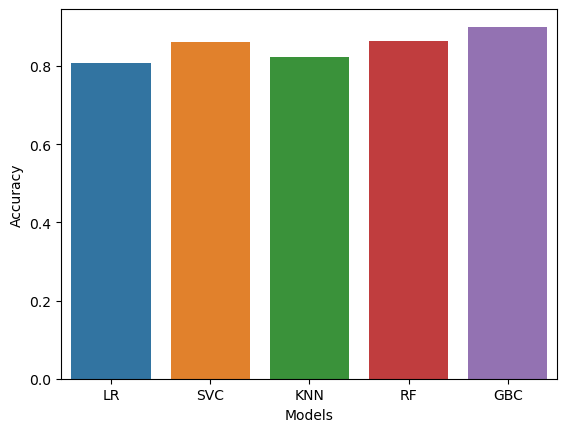

In [103]:
sns.barplot(final_data['Models'],final_data['Accuracy'])